In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stanford-sentiment-treebank-v2-sst2/BERT-SST2-Dataset-Paper.pdf
/kaggle/input/stanford-sentiment-treebank-v2-sst2/Writing Code for NLP Research.pdf
/kaggle/input/stanford-sentiment-treebank-v2-sst2/SST2-Data/SST2-Data/stanfordSentimentTreebankRaw/stanfordSentimentTreebankRaw/README.txt
/kaggle/input/stanford-sentiment-treebank-v2-sst2/SST2-Data/SST2-Data/stanfordSentimentTreebankRaw/stanfordSentimentTreebankRaw/sentlex_exp12.txt
/kaggle/input/stanford-sentiment-treebank-v2-sst2/SST2-Data/SST2-Data/stanfordSentimentTreebankRaw/stanfordSentimentTreebankRaw/rawscores_exp12.txt
/kaggle/input/stanford-sentiment-treebank-v2-sst2/SST2-Data/SST2-Data/trainDevTestTrees_PTB/trees/test.txt
/kaggle/input/stanford-sentiment-treebank-v2-sst2/SST2-Data/SST2-Data/trainDevTestTrees_PTB/trees/train.txt
/kaggle/input/stanford-sentiment-treebank-v2-sst2/SST2-Data/SST2-Data/trainDevTestTrees_PTB/trees/dev.txt
/kaggle/input/stanford-sentiment-treebank-v2-sst2/SST2-Data/SST2-Data/stanfordSentim

In [53]:
for dirname, _, filenames in os.walk('/kaggle/working'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/working/sst_dev.txt
/kaggle/working/__notebook_source__.ipynb
/kaggle/working/sst_test.txt
/kaggle/working/sst_train.txt


In [2]:
!pip install pytreebank

  Preparing metadata (setup.py) ... done
  Created wheel for pytreebank: filename=pytreebank-0.2.7-py3-none-any.whl size=37071 sha256=9a439a47d740a6802ab0b66a9dc3d0aaae0b459d8b4efeea0fbc73dd2ef79449
  Stored in directory: /root/.cache/pip/wheels/5b/84/1b/8fbd390149c4c56517bf3cb62bb25d3cf6f5cf575e66710ced
Successfully built pytreebank


#### Pytreebank : It is used for loading sst data

In [10]:
ls /kaggle/input/stanford-sentiment-treebank-v2-sst2/SST2-Data/SST2-Data/stanfordSentimentTreebank/stanfordSentimentTreebank/

README.txt  STree.txt             datasetSplit.txt  original_rt_snippets.txt
SOStr.txt   datasetSentences.txt  dictionary.txt    sentiment_labels.txt


## import required Libraries

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import fasttext
from sklearn.metrics import f1_score,accuracy_score
import matplotlib.pyplot as plt
import pytreebank
import os,sys

## Reading and formatting dataset

In [13]:
data = pytreebank.load_sst("/kaggle/input/stanford-sentiment-treebank-v2-sst2/SST2-Data/SST2-Data/trainDevTestTrees_PTB/trees/")

In [17]:
for item in data['train']:
    print(item.to_labeled_lines()[1][0],item.to_labeled_lines()[0][1])
    break
    

2 The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal .


In [49]:
data['train'][0].to_labeled_lines()

[(3,
  "The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal ."),
 (2, 'The Rock'),
 (2, 'The'),
 (2, 'Rock'),
 (4,
  "is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal ."),
 (3,
  "is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal"),
 (2, 'is'),
 (4,
  "destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal"),
 (2, 'destined'),
 (2,
  "to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal"),
 (2, "to be the 2

In [51]:
out_path = os.path.join("/kaggle/working/sst_{}.txt")# new file format

#### formatting data from {(label,sentence) => label  sentence} format

In [52]:
for cat in ['train','test','dev']:
    with open(out_path.format(cat),"w") as file:
        for item in data[cat]:
            file.write("__label__{}\t{}\n".format(
                item.to_labeled_lines()[0][0] +1,
                item.to_labeled_lines()[0][1]
            ))
    
    print("done with {}".format(file))

done with <_io.TextIOWrapper name='/kaggle/working/sst_train.txt' mode='w' encoding='UTF-8'>
done with <_io.TextIOWrapper name='/kaggle/working/sst_test.txt' mode='w' encoding='UTF-8'>
done with <_io.TextIOWrapper name='/kaggle/working/sst_dev.txt' mode='w' encoding='UTF-8'>


In [54]:
len(data['train'])

8544

In [55]:
# now you can read the formatted files from pandas easily
train = pd.read_csv("/kaggle/working/sst_train.txt",sep="\t",header=None,names=['label','text'])
train['label'] = train['label'].str.replace("__label__","")
train['label'] = train['label'].astype(int).astype("category")

In [57]:
train.tail()

,label,text
8539,1,A real snooze .
8540,2,No surprises .
8541,4,We 've seen the hippie-turned-yuppie plot befo...
8542,1,Her fans walked out muttering words like `` ho...
8543,2,In this case zero .


In [58]:
train['len'] = train['text'].str.len()

In [59]:
train.head()

,label,text,len
0,4,The Rock is destined to be the 21st Century 's...,181
1,5,The gorgeously elaborate continuation of `` Th...,226
2,4,Singer/composer Bryan Adams contributes a slew...,208
3,3,You 'd think by now America would have had eno...,100
4,4,Yet the act is still charming here .,36


In [65]:
train.describe()

,len
count,8544.000000
mean,102.310393
std,51.430023
min,4.000000
25%,62.000000
50%,98.000000
75%,137.000000
max,267.000000


In [70]:
test = pd.read_csv("/kaggle/working/sst_test.txt",sep="\t",header=None,names=['label','text'])
test['label'] = test['label'].str.replace("__label__","")
test['label'] = test['label'].astype(int).astype("category")

In [71]:
test.head()

,label,text
0,3,Effective but too-tepid biopic
1,4,If you sometimes like to go to the movies to h...
2,5,"Emerges as something rare , an issue movie tha..."
3,3,The film provides some great insight into the ...
4,5,Offers that rare combination of entertainment ...


In [78]:
train.label.value_counts().sort_index()

1    1092
2    2218
3    1624
4    2322
5    1288
Name: label, dtype: int64

In [86]:
label_values = {
    1: 'Very negative',
    2: 'Negative',
    3: 'Neutral',
    4: 'Positive',
    5: 'Very positive'
}

In [89]:
train['label_text'] = train['label'].apply(lambda x : label_values[x])

In [90]:
train.head()

,label,text,len,label_text
0,4,The Rock is destined to be the 21st Century 's...,181,Positive
1,5,The gorgeously elaborate continuation of `` Th...,226,Very positive
2,4,Singer/composer Bryan Adams contributes a slew...,208,Positive
3,3,You 'd think by now America would have had eno...,100,Neutral
4,4,Yet the act is still charming here .,36,Positive


[Text(0, 0, 'Very negative'),
 Text(0, 1, 'Negative'),
 Text(0, 2, 'Neutral'),
 Text(0, 3, 'Positive'),
 Text(0, 4, 'Very positive')]

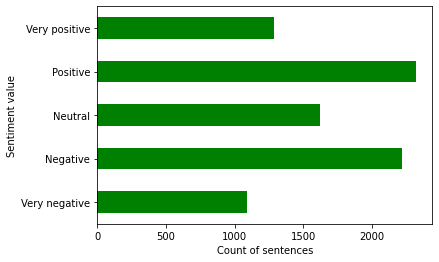

In [111]:
ax = train.label.value_counts().sort_index().plot(kind='barh', figsize = (6, 4), color = 'g')
ax.set_xlabel('Count of sentences')
ax.set_ylabel('Sentiment value')
ax.set_yticklabels(label_values.values())

There seems to be an imbalance in the distribution of data**

In [112]:
pytreebank.LabeledTree.inject_visualization_javascript()

In [114]:
example = data["train"][0]

In [116]:
example.display()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Testing Different Models now 

#### Why we haven't done the cleaning ?
#### Ans : Because we are already using models that gets easily trained on these types of datasets , if you want some better than you can experience it on your own and check the results

### => I am now using test data but you can use train data as well !

In [ ]:
def f1_acc(df,pred_column):
    f1_macro  = f1_score(df['label'],df[pred_column],average='macro')
    acc = accuracy_score(df['label'],df[pred_column])*100
    print("F1 Score : {} \n Accuracy : {}".format(f1_macro,acc))

## Using TextBlob

In [ ]:
def textblob_score(sentence):
    return TextBlob(sentence).sentiment.polarity

In [ ]:
test['textblob_score'] =  test['text'].apply(textblob_score)
test.head()

In [ ]:

test['textblob_pred'] = pd.cut(test['textblob_score'],bins=5,labels=[1,2,3,4,5])
test  = test.drop(['textblob_score'],axis=1)

#### Pd.cut Usage https://www.geeksforgeeks.org/pandas-cut-method-in-python/
### It is used to convert a numerical value in range like age to age-group

In [ ]:
test.head()

In [ ]:
f1_acc(test,"textblob_pred")

### Using Vader Sentiment

In [ ]:
vader = SentimentIntensityAnalyzer()

def vader_score(sent,vader):
    return vader.polarity_scores(sent)['compound']

### what is compound score and how it is calculated (it is even not an avg of pos and neg, you can check) ? 
#### comment me if you get the answer 

In [ ]:
test['vader_score'] =  test['text'].apply(lambda x : vader_score(x,vader))
test.head()

In [ ]:
test['vader_pred'] = pd.cut(test['vader_score'],bins=5,labels=[1,2,3,4,5])
test = test.drop('vader_score',axis=1)
test.head()

In [ ]:
f1_acc(test,"vader_pred")

### Best model => Vader Sentiment (has higher f1 score)

In [ ]:
test['textblob_pred'] = test['textblob_pred'].astype(int)
test['vader_pred'] = test['vader_pred'].astype(int)

In [ ]:
test.plot(x='label',y=['textblob_pred','vader_pred'],kind='bar')

In [ ]:
### please leave  a comment , this keeps me motivated 
########### Thanks for visiting ############## 